In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

first we load train and test data 

In [235]:
df_train=pd.read_csv("C:\\Users\\anshu\\Downloads\\mushroom_train.csv")
df_test=pd.read_csv("C:\\Users\\anshu\\Downloads\\mushroom_test.csv")

In [236]:
mushroom=df_train
df_train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


Here we are checking possible values each variable can take and for stalk-root we notice that '?' is also a possible value.

In [237]:
for c in df_train.columns:    
    if (df_train[c].dtype==object):
        print(c,df_train[c].unique())

class ['p' 'e']
cap-shape ['f' 'x' 'b' 'k' 's' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['e' 'w' 'n' 'y' 'g' 'b' 'p' 'r' 'u' 'c']
bruises ['f' 't']
odor ['s' 'p' 'n' 'y' 'l' 'f' 'c' 'm' 'a']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['b' 'k' 'e' 'n' 'h' 'p' 'u' 'g' 'w' 'y' 'o' 'r']
stalk-shape ['t' 'e']
stalk-root ['?' 'e' 'c' 'b' 'r']
stalk-surface-above-ring ['s' 'k' 'f' 'y']
stalk-surface-below-ring ['k' 's' 'f' 'y']
stalk-color-above-ring ['p' 'w' 'e' 'g' 'b' 'c' 'n' 'o' 'y']
stalk-color-below-ring ['w' 'e' 'n' 'p' 'b' 'g' 'c' 'o' 'y']
veil-type ['p']
veil-color ['w' 'o' 'n' 'y']
ring-number ['o' 't' 'n']
ring-type ['e' 'p' 'l' 'f' 'n']
spore-print-color ['w' 'n' 'h' 'k' 'u' 'o' 'b' 'y' 'r']
population ['v' 'c' 's' 'y' 'a' 'n']
habitat ['l' 'u' 'w' 'm' 'g' 'd' 'p']


In [238]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 25 columns):
class                       5686 non-null object
cap-shape                   5686 non-null object
cap-surface                 5686 non-null object
cap-color                   5686 non-null object
bruises                     5686 non-null object
odor                        5686 non-null object
gill-attachment             5686 non-null object
gill-spacing                5686 non-null object
gill-size                   5686 non-null object
gill-color                  5686 non-null object
stalk-shape                 5686 non-null object
stalk-root                  5686 non-null object
radius                      5686 non-null int64
stalk-surface-above-ring    5686 non-null object
stalk-surface-below-ring    5686 non-null object
stalk-color-above-ring      5686 non-null object
stalk-color-below-ring      5686 non-null object
veil-type                   5686 non-null object
veil-color  

here we are just selection features with categorical data into a list named cv.

In [239]:
cv=[]
for c in df_train.columns:
    if df_train[c].dtype==object:
        cv.append(c)       

In [240]:
cv

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

here we can see that data is not biased towards any particular class.

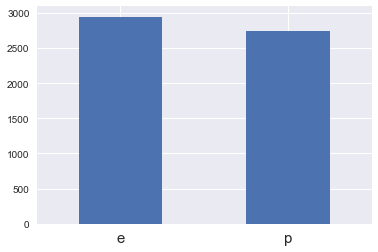

In [241]:
a=df_train['class'].value_counts().plot(kind='bar')
a.set_xticklabels(labels=['e','p'],size=(15),rotation=0)

here we seperate our labels  from training data and create a different series for labels.

In [242]:
label_train=df_train['class']
df_train.drop('class',axis=1,inplace=True)

here we concat both our test and training data.

In [243]:
print(df_train.shape,df_test.shape)
df=pd.concat([df_train,df_test],axis=0)
print(df.shape)

(5686, 24) (2438, 24)
(8124, 24)


here we map values of stalk root to integers and '?' to nan so that we can use mean imputation on stalk- root later

In [244]:
df['stalk-root']=df['stalk-root'].map({'?':np.nan,'e':1,'c':2,'b':3,'r':4})
df['stalk-root'].unique()


array([ nan,   1.,   2.,   3.,   4.])

In [245]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,f,s,e,f,s,f,c,n,b,t,...,p,w,p,w,38,o,e,w,v,l
1,x,y,w,t,p,f,c,n,k,e,...,w,w,p,w,43,o,p,n,v,u
2,f,s,n,t,n,f,c,b,e,e,...,e,e,p,w,37,t,e,w,c,w
3,x,s,e,f,y,f,c,n,b,t,...,p,w,p,w,82,o,e,w,v,l
4,x,s,w,t,l,f,c,b,n,e,...,w,w,p,w,36,o,p,n,s,m


to map string type data types to integers and here we remove class and stalk-root from cv as class is not there in df 
and we have already mapped stalk-root to integers.

In [246]:
cv.remove('class')
cv.remove('stalk-root')
print(cv)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in cv:
    df[c]=le.fit_transform(df[c])

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


here we are using default mean imputation method so that all the null values in the dataset are replaced.

In [247]:
from sklearn.preprocessing import Imputer
im=Imputer()
m=im.fit_transform(df)
d=pd.DataFrame(m,columns=df.columns)
d.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,2.0,2.0,2.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0,...,6.0,7.0,0.0,2.0,38.0,1.0,0.0,7.0,4.0,2.0
1,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,7.0,7.0,0.0,2.0,43.0,1.0,4.0,3.0,4.0,5.0
2,2.0,2.0,4.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,...,2.0,2.0,0.0,2.0,37.0,2.0,0.0,7.0,1.0,6.0
3,5.0,2.0,2.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,6.0,7.0,0.0,2.0,82.0,1.0,0.0,7.0,4.0,2.0
4,5.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,7.0,7.0,0.0,2.0,36.0,1.0,4.0,3.0,3.0,3.0


In [249]:
d['stalk-root'].unique()

array([ 2.53862509,  1.        ,  2.        ,  3.        ,  4.        ])

here we are checking all the columns which have standard deviation=0 and  drop them as they are of no use.

In [250]:
l=[]
for col in d.columns:
    if d[col].std()==0:
        l.append(col)
print(l)
d.drop('veil-type',axis=1,inplace=True)

['veil-type']


here we  seprate our train and test data .

In [251]:
df_train=d[:5686]
df_test=d[5686:]

here we map our labels to integer values.

In [252]:
label_train=label_train.map({'p':0,'e':1})
label_train.head()

0    0
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [253]:
df_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,2.0,2.0,2.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0,...,1.0,6.0,7.0,2.0,38.0,1.0,0.0,7.0,4.0,2.0
1,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,2.0,43.0,1.0,4.0,3.0,4.0,5.0
2,2.0,2.0,4.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,...,2.0,2.0,2.0,2.0,37.0,2.0,0.0,7.0,1.0,6.0
3,5.0,2.0,2.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,2.0,6.0,7.0,2.0,82.0,1.0,0.0,7.0,4.0,2.0
4,5.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,2.0,36.0,1.0,4.0,3.0,3.0,3.0


here we are using boxplot to check for distribution of data w.r.t radius and also to get information about outliers

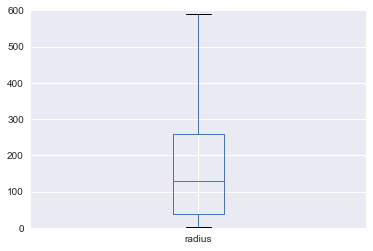

In [254]:
df_train.boxplot(column='radius')
plt.ylim(0,600)
plt.show()

here we are using boxplot to check for distribution of data w.r.t weight and also to get information about outliers

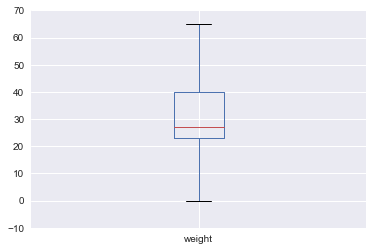

In [255]:
df_train.boxplot(column='weight')
plt.ylim(-10,70)
plt.show()

In [256]:
l=df.columns
l=list(l)
l.remove('veil-type')

here we standardize our data for better results.

In [257]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_train=ss.fit_transform(df_train)
df_test=ss.fit_transform(df_test)
df_train=pd.DataFrame(df_train,columns=l)
df_test=pd.DataFrame(df_test,columns=l)
df_train=pd.concat([df_train,label_train],axis=1)

In [258]:
df_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,class
0,-0.849873,0.136585,-0.985559,-0.850926,1.354281,0.155356,-0.438501,1.495392,-1.362194,0.873869,...,0.100228,0.632519,0.13297,0.372817,-0.263064,-1.277884,1.423104,0.277477,0.289209,0
1,1.022658,0.948105,1.373642,1.175190,0.876378,0.155356,-0.438501,1.495392,-0.230854,-1.144336,...,0.625476,0.632519,0.13297,0.746568,-0.263064,0.944489,-0.255251,0.277477,2.028746,0
2,-0.849873,0.136585,-0.199159,1.175190,0.398476,0.155356,-0.438501,-0.668721,-1.079359,-1.144336,...,-2.000766,-1.956383,0.13297,0.298067,3.376313,-1.277884,1.423104,-2.134961,2.608592,1
3,1.022658,0.136585,-0.985559,-0.850926,1.832183,0.155356,-0.438501,1.495392,-1.362194,0.873869,...,0.100228,0.632519,0.13297,3.661822,-0.263064,-1.277884,1.423104,0.277477,0.289209,0
4,1.022658,0.136585,1.373642,1.175190,-0.557329,0.155356,-0.438501,-0.668721,0.051981,-1.144336,...,0.625476,0.632519,0.13297,0.223317,-0.263064,0.944489,-0.255251,-0.526669,0.869055,1


Here we will use violin plot  to see the density distribution of each features w.r.t class

(-5, 5)

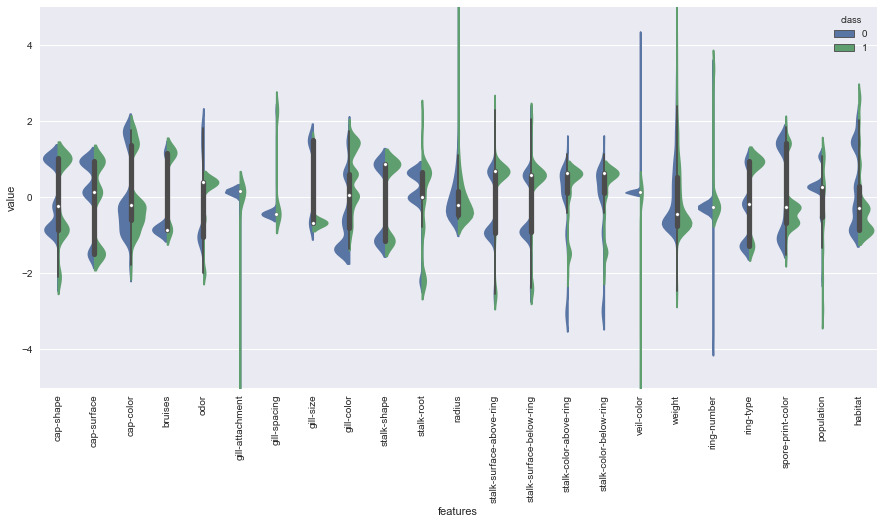

In [259]:
df_new=pd.melt(df_train,'class',var_name='features')
fig,ax=plt.subplots(figsize=(15,7))
a=sns.violinplot(ax=ax,x="features",y="value",hue="class",data=df_new,split=True)
a.set_xticklabels(rotation=90,labels=d.columns)
plt.ylim(-5,5)

here we  plot a heatmap of correaltions between all the parameters.

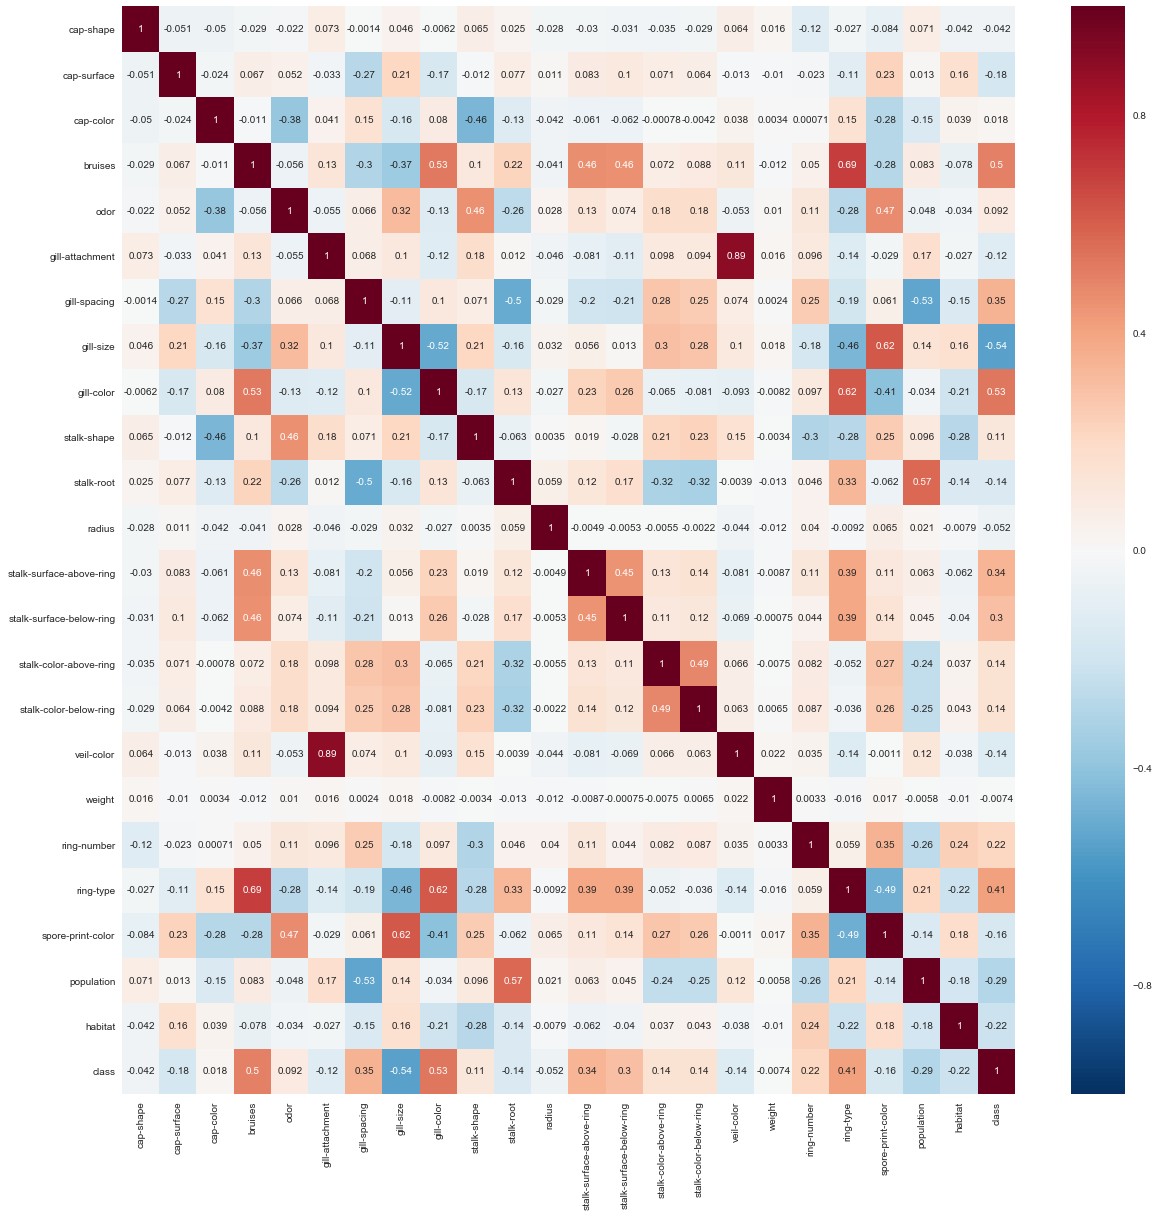

In [261]:
cor=df_train.corr()
s=sns.heatmap(cor,annot=True)
plt.rcParams["figure.figsize"]=(20,20)

In [262]:
df_train.drop('class',axis=1,inplace=True)
X=df_train
y=label_train

In [263]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

here we are using simple logistic regression for classification and we observe that accracy score using simple LR is .94

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit_transform(X_train,y_train)
predict=lr.predict(X_test)
print(accuracy_score(predict,y_test))
predict1=lr.predict(df_test)
predict1=pd.DataFrame(predict1)
predict1.to_csv('label_logistic_Regression.csv')

0.939367311072


C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


here we use decision tree classifier as our classification model and accuracy comes out to be 1 :)

In [266]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit_transform(X_train,y_train)
predict=dct.predict(X_test)
predict1=dct.predict(df_test)
print(accuracy_score(predict,y_test))
predict1=pd.DataFrame(predict1)
predict1.to_csv('label_DCT.csv')

1.0


C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


here we are using RandomForestClassifer to classify. 

In [268]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit_transform(X_train,y_train)
predict=rfc.predict(X_test)
print(accuracy_score(predict,y_test))
predict1=rfc.predict(df_test)
predict1=pd.DataFrame(predict1)
predict1.to_csv('label_RFC.csv')

1.0


C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


here we are plotting features importances using feature_importances method and we see that odor and gill color are two most important features whereas gill-attachment and veil-color are two least important features.

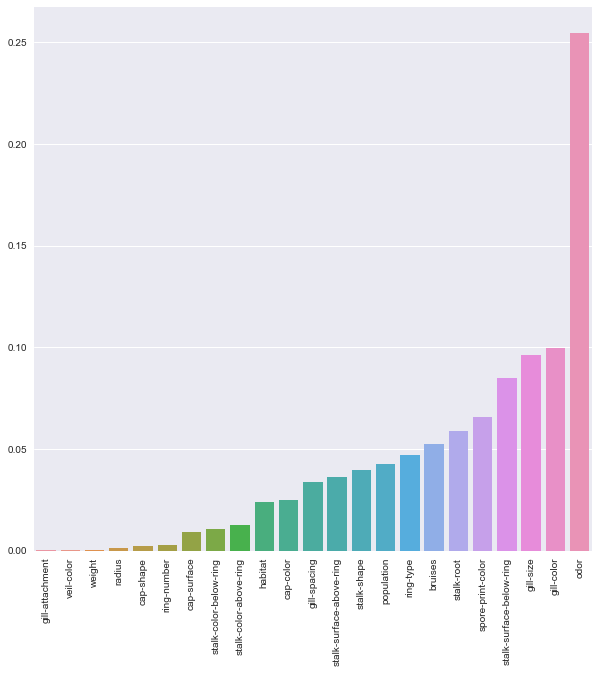

In [270]:
imp=rfc.feature_importances_
imp,name=zip(*sorted(zip(imp,X.columns)))
a=sns.barplot(name,imp)
a.set_xticklabels(labels=name,rotation=90)
plt.rcParams["figure.figsize"]=(10,10)

first we will look at plots of two most important features .

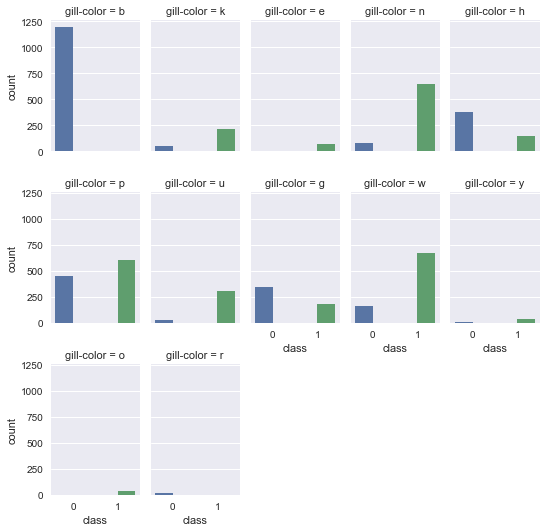

In [272]:
mush=pd.concat([mushroom,label_train],axis=1)
sns.factorplot('class',col='gill-color',data=mush,kind='count',hue='class',size=2.5,aspect=0.6, col_wrap=5)

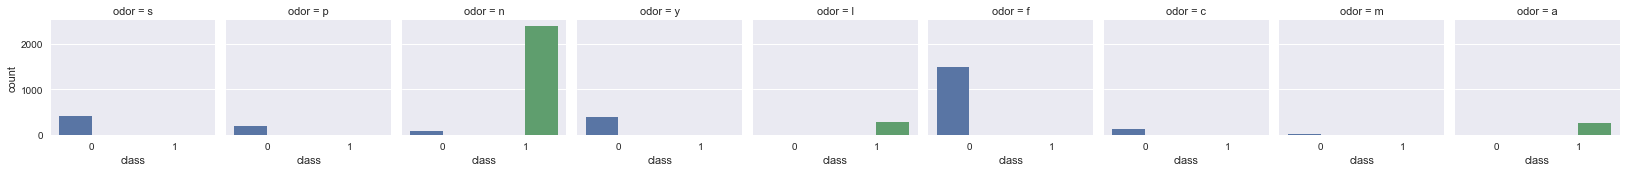

In [273]:
sns.factorplot('class',col='odor',data=mush,kind='count',hue='class',size=2.5)

now we will look at plot of two least important features

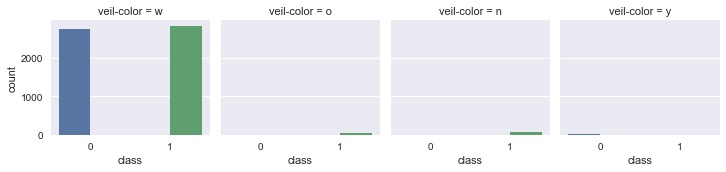

In [274]:
sns.factorplot('class',col='veil-color',data=mush,kind='count',hue='class',size=2.5)

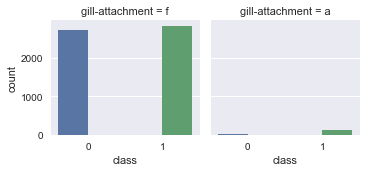

In [275]:
sns.factorplot('class',col='gill-attachment',data=mush,kind='count',hue='class',size=2.5)

here we will use principle component analysis with 2 components so that we can look at scatter plot of data w.r.t to these
components

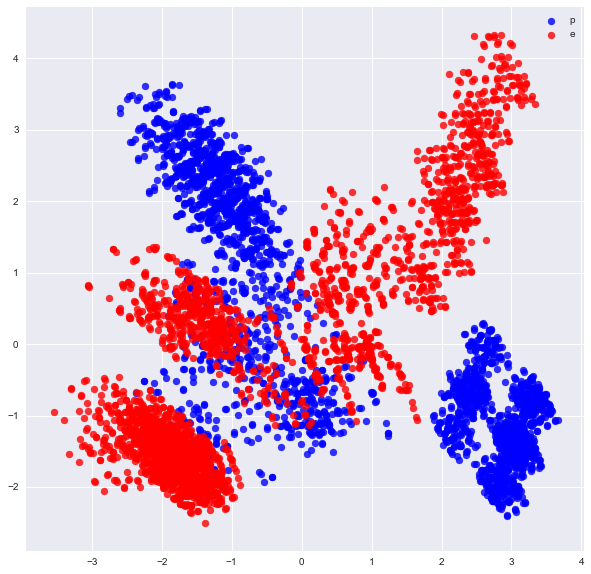

In [276]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_r=pca.fit_transform(X)
plt.figure()
colors = ['blue','red']
lw = 2

for color, i, target_name in zip(colors, [0, 1], ['p','e']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

here we will plot decesion boundary for SVM 

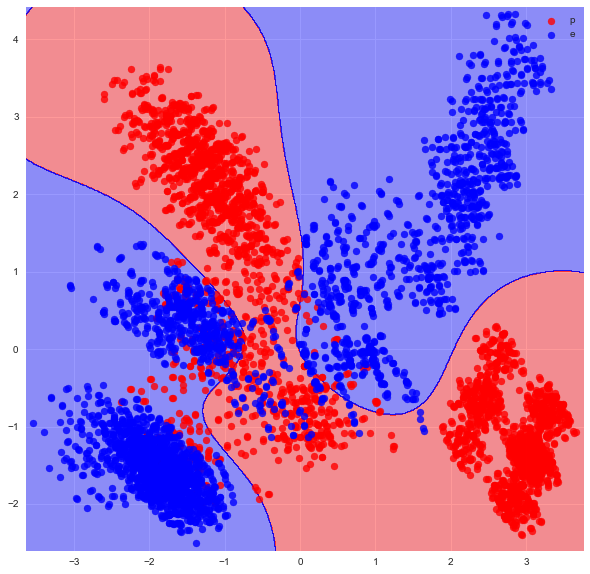

In [281]:
from matplotlib.colors import ListedColormap
from sklearn import svm

markers = ('s', 'x', 'o', '^', 'v')    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  
cmap = ListedColormap(colors[:len(np.unique(y))])
classifier=svm.SVC(kernel='rbf')
resolution=0.01
x1_min, x1_max = X_r[:, 0].min() - .1, X_r[:, 0].max() + .1 
x2_min, x2_max = X_r[:, 1].min() - .1, X_r[:, 1].max() + .1  
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
classifier.fit(X_r,y)
Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  
Z = Z.reshape(xx1.shape) 
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)   
plt.xlim(xx1.min(), xx1.max())  
plt.ylim(xx2.min(), xx2.max())
for color, i, target_name in zip(colors, [0, 1], ['p','e']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)


now we will plot decision boundary for decision tree classifier

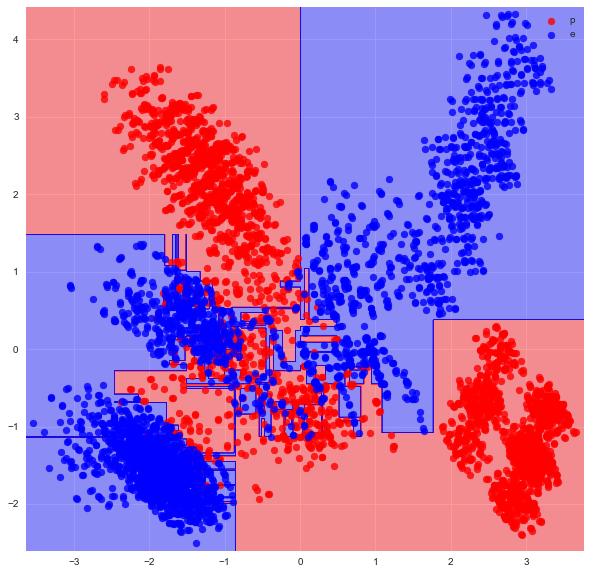

In [282]:
from matplotlib.colors import ListedColormap
markers = ('s', 'x', 'o', '^', 'v')    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  
cmap = ListedColormap(colors[:len(np.unique(y))])
 
classifier=DecisionTreeClassifier()
resolution=0.01
x1_min, x1_max = X_r[:, 0].min() - .1, X_r[:, 0].max() + .1 
x2_min, x2_max = X_r[:, 1].min() - .1, X_r[:, 1].max() + .1  
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
classifier.fit(X_r,y)
Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  
Z = Z.reshape(xx1.shape) 
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)   
plt.xlim(xx1.min(), xx1.max())  
plt.ylim(xx2.min(), xx2.max())
for color, i, target_name in zip(colors, [0, 1], ['p','e']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

now we in the last we will plot decision boundary for random forest classifier 

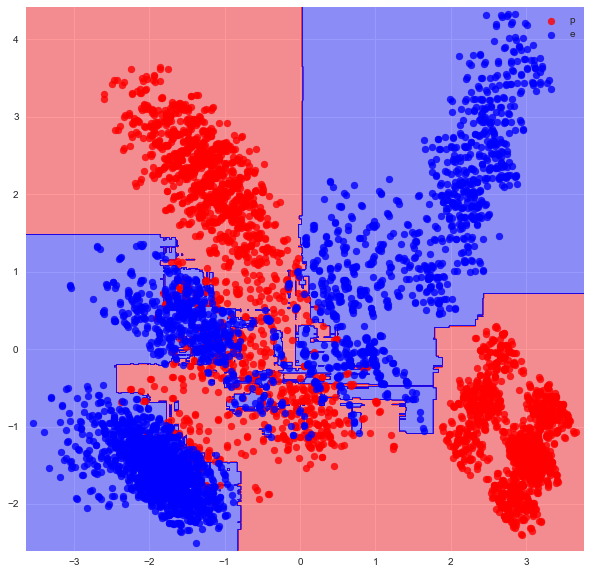

In [283]:
from matplotlib.colors import ListedColormap
markers = ('s', 'x', 'o', '^', 'v')    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  
cmap = ListedColormap(colors[:len(np.unique(y))])
 
classifier=RandomForestClassifier()
resolution=0.01
x1_min, x1_max = X_r[:, 0].min() - .1, X_r[:, 0].max() + .1 
x2_min, x2_max = X_r[:, 1].min() - .1, X_r[:, 1].max() + .1  
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
classifier.fit(X_r,y)
Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  
Z = Z.reshape(xx1.shape) 
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)   
plt.xlim(xx1.min(), xx1.max())  
plt.ylim(xx2.min(), xx2.max())
for color, i, target_name in zip(colors, [0, 1], ['p','e']):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)